In [23]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy.matlib
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import numpy.matlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn import tree

from sklearn.metrics import roc_auc_score,accuracy_score,roc_curve,auc
from scipy.stats import ttest_ind
from scipy import interp

import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
 


In [24]:
df = pd.read_csv('train_model.csv', index_col=[0])
df = df.drop(columns=['model', 'trim', 'make', 'year', 'state', 'sellingprice']) 
len(df.columns)

41

In [25]:
Y = df.label 
X = df.drop('label',axis = 1)

In [26]:
df.label.value_counts()

0    119966
1     50330
Name: label, dtype: int64

In [27]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
oversample = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversample.fit_resample(X, Y)
oversample.fit_resample(X, Y)
# summarize class distribution
print(Counter(y_over))
X_train, X_test, y_train, y_test = train_test_split( 
X_over, y_over, train_size=0.7, test_size=0.3, random_state=100)

Counter({0: 119966, 1: 119966})


In [28]:
cor = 0
miss = 0

#clf = svm.SVC().fit(X_train.T, y_train) #0
#clf = LDA().fit(X_train.T, y_train) #0.2
#clf = LogisticRegression(random_state=0,max_iter = 100).fit(X_train.T, y_train) #0.4
#clf = xgb.XGBClassifier()


#clf = MLPClassifier(random_state=1, max_iter=1000) #0.829
#clf = KNeighborsClassifier(n_neighbors=2)  # 79.5
#clf = DecisionTreeClassifier(random_state=0) #90.7
clf = RandomForestClassifier(n_estimators=50)#0.927
#clf = GaussianNB() #74

#clf = QuadraticDiscriminantAnalysis() #0.45
#clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    
clf.fit(X_train, y_train)
result = clf.predict(X_test)
# if result == y_test:
#     cor = cor+1
# else:
#     miss = miss+1
# print(cor/(cor+miss))

In [29]:
result

array([1, 0, 1, ..., 1, 1, 1])

In [30]:
# if result == y_test:
#     cor = cor+1
# else:
#     miss = miss+1
# print(cor/(cor+miss))
from sklearn.metrics import accuracy_score
accuracy_score(y_test, result)

0.8185051403167547

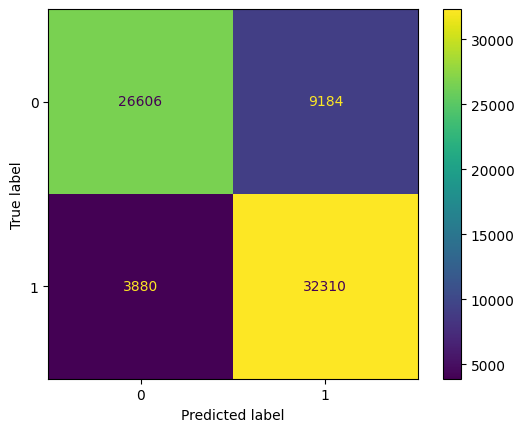

In [31]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, result, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()

plt.show()

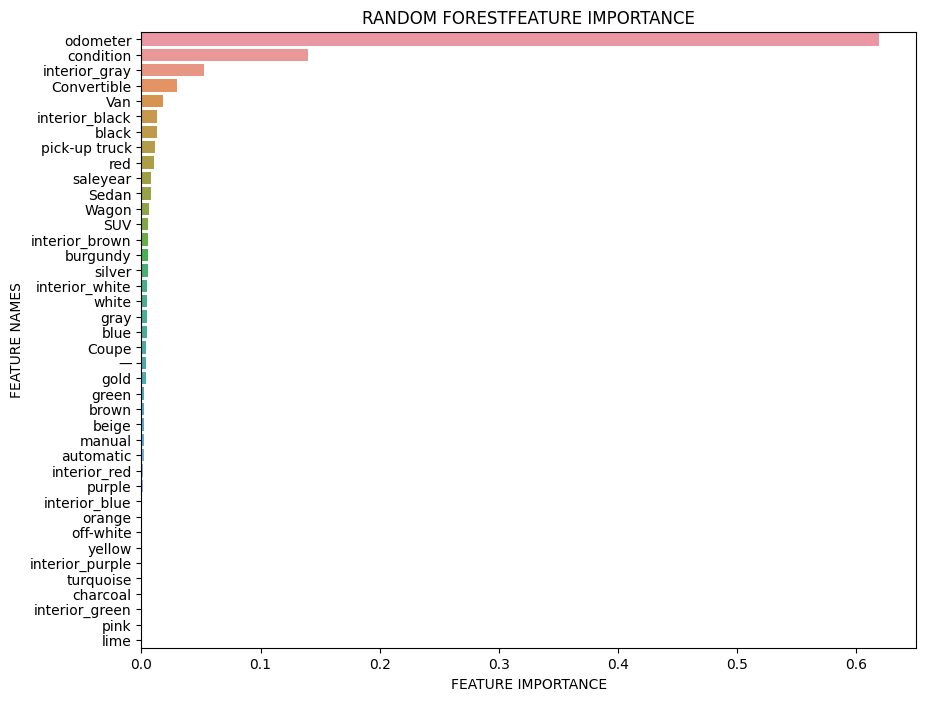

In [32]:
import seaborn as sns
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(clf.feature_importances_,X.columns,'RANDOM FOREST')

In [18]:
clf.feature_importances_

array([8.82549286e-02, 2.44802772e-01, 4.34304571e-01, 6.43617013e-03,
       1.87504225e-03, 1.16453170e-02, 4.81103764e-03, 1.98396371e-03,
       4.51882706e-03, 1.40016479e-04, 2.36073117e-03, 4.30867447e-03,
       2.28621317e-03, 0.00000000e+00, 3.89396334e-04, 5.41512047e-04,
       1.49286603e-05, 7.27130584e-04, 7.06741222e-03, 4.64233742e-03,
       1.26448071e-04, 4.12539414e-03, 2.74647982e-04, 2.74299212e-03,
       1.11588864e-02, 5.34143482e-04, 6.65636984e-03, 3.85027777e-02,
       1.06153079e-04, 1.76676344e-04, 9.12405292e-04, 5.23211487e-03,
       1.91218460e-03, 1.96800628e-03, 2.47793648e-02, 7.20563598e-03,
       1.37448323e-02, 1.84628039e-02, 2.02641339e-02, 4.05349243e-03,
       1.59495551e-02])